In [1]:
import os
from dotenv import load_dotenv
import openai
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [4]:
load_dotenv()
openai.api_key = os.getenv("OPENAI_API_KEY")

In [5]:
df = pd.read_csv("dataset.csv")

In [6]:
df.head()

,invoice_num,Seller_desc,Cosignee_desc,Buyer_desc,date,date_of_fulfilment,date_of_upload,mode_of_payment,product_desc,HSN,...,Tax_amount,Payment_details,Acc_num,IFSC,Bank_name,Branch,Dispateched_through,motor_num,destination,Status
0,101,SMITA ARORA,"X O Footwear Pvt Ltd, A-122, phase 2, Mangolpu...","X O Footwear Pvt Ltd, A-122, phase 2, Mangolpu...",29/11/2022,NaN,29/11/2022,CHEQUE,"LIVE HORSES, ASSES, MULES AND HINNIES PURE-BRE...",1011010,...,3272.94,NaN,44444444444,900800,BANK OF BARODA,ASHOK VIHAR,TATA 407,9413,NANGLOI,pending
1,102,VIPIN GARG,"X O Footwear Pvt Ltd, A-122, phase 2, Mangolpu...","X O Footwear Pvt Ltd, A-122, phase 2, Mangolpu...",17/04/2022,NaN,17/04/2022,CASH,"LIVE HORSES, ASSES, MULESANDHINNIES PURE-BRED ...",1011020,...,1859.76,NaN,44444444444,456987,ICICI BANK,SOUTH EX,TATA 407,8485,NANGLOI,pending
2,103,TECHNOPLAST ENTERPRISES PVT. LTD.,"X O Footwear Pvt Ltd, A-122, phase 2, Mangolpu...","X O Footwear Pvt Ltd, A-122, phase 2, Mangolpu...",26/06/2022,NaN,26/06/2022,CHEQUE,"LIVE HORSES, ASSES, MULES AND HINNIES PURE-BRE...",1011090,...,6018.30,NaN,44444444444,456732,ICICI BANK,NAGLOI,SUMO,5431,NANGLOI,pending
3,104,ARGUS,"X O Footwear Pvt Ltd, A-122, phase 2, Mangolpu...","X O Footwear Pvt Ltd, A-122, phase 2, Mangolpu...",04/08/2022,NaN,04/08/2022,CHEQUE,"LIVE HORSES, ASSES, MULES AND HINNIES - OTHER ...",1019010,...,810.00,NaN,99999999999,125678,ICICI BANK,NAGLOI,HATHI,7764,BAHADURGARH,pending
4,105,SUMITRA MEHTA,"X O Footwear Pvt Ltd, A-122, phase 2, Mangolpu...","X O Footwear Pvt Ltd, A-122, phase 2, Mangolpu...",28/01/2022,NaN,28/01/2022,CASH,"LIVE HORSES, ASSES, MULES AND HINNIES - OTHER ...",1019020,...,3078.00,NaN,88888888888,125678,CANARA BANK,WAZIRPUR,SUMO,6484,NANGLOI,pending


In [7]:
df_datatypes = df.dtypes

In [8]:
df_columns = list(df.columns.values)

In [9]:
def get_response(query):
  return openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "system", "content": "You are a helpful AI assistant who helps Exploring and Visualising data."},
        {"role": "user", "content": f"Here is list of all the columns in my dataframe {df_columns} and datatype dictionary of each column {dict(df_datatypes)} also first 3 rows of the dataframe {df.head(3)}."},
        {"role": "user", "content": f"""From now on respond only a python script which will fetch the requested data.
            Note: -I already have all the required importes.
                  -I've already imported dataframe and stored it inside df variable.
                  -You can change datatype of required column if required.
                  -Strictly respond with a single line of python code which can get requested data from dataframe (df variable).
                  -Date time format is DD/MM/YYYY.
                  -Store response in out variable.
            Follow following steps:
            -> If qestion includes fetching details from `Seller_desc` column then first covert both fields (user query and data frame) to lowercase first then compare.
        """},
        {"role": "user", "content": f"Here is the user query delimited between <> <{query}>"}
    ]
)

##How many invoices are active in July 2022?

In [10]:
response = get_response("How many invoices are active in July 2022?")
response = response["choices"][0]["message"]["content"]

In [11]:
response

"out = len(df[df['date'].str.contains('07/2022', na=False)])"

In [12]:
out =  len(df[(df['Status'] == 'pending') & (df['date'].str.contains('07/2022'))])

In [ ]:
df[(df['Status'] == 'pending') & (df['date'].str.contains('07/2022'))].head()

,invoice_num,Seller_desc,Cosignee_desc,Buyer_desc,date,date_of_fulfilment,date_of_upload,mode_of_payment,product_desc,HSN,...,Tax_amount,Payment_details,Acc_num,IFSC,Bank_name,Branch,Dispateched_through,motor_num,destination,Status
10,111,NEHA AGGARWAL,"X O Footwear Pvt Ltd, A-122, phase 2, Mangolpu...","X O Footwear Pvt Ltd, A-122, phase 2, Mangolpu...",25/07/2022,NaN,25/07/2022,CASH,LIVE BOVINE ANIMALS - OTHER - BULLS - ADULT,1029010,...,602.64,NaN,99999999999,456732,HDFC BANK,NAGLOI,TATA 407,9357,BAHADURGARH,pending
463,564,RAJAN VERMA,"X O Footwear Pvt Ltd, A-122, phase 2, Mangolpu...","X O Footwear Pvt Ltd, A-122, phase 2, Mangolpu...",06/07/2022,NaN,06/07/2022,CHEQUE,"SKINS AND OTHER PARTS OF BIRDS, WITH THEIR - F...",5059091,...,699.84,NaN,77777777777,125678,BANK OF BARODA,NAGLOI,TATA 407,5084,BAHADURGARH,pending
466,567,RAJ STUDIO,"X O Footwear Pvt Ltd, A-122, phase 2, Mangolpu...","X O Footwear Pvt Ltd, A-122, phase 2, Mangolpu...",01/07/2022,NaN,01/07/2022,CHEQUE,"BONES AND HORN-CORES, UNWORKED, - DEFATTED, SI...",5061019,...,742.14,NaN,44444444444,456732,BANK OF BARODA,ASHOK VIHAR,HATHI,5017,KUNDLI,pending
470,571,NATRAJ HOME FURNISHING PVT. LTD.,"X O Footwear Pvt Ltd, A-122, phase 2, Mangolpu...","X O Footwear Pvt Ltd, A-122, phase 2, Mangolpu...",17/07/2022,NaN,17/07/2022,CASH,"BONES AND HORN-CORES, UNWORKED, - DEFATTED, SI...",5061039,...,1732.50,NaN,66666666666,986123,BANK OF BARODA,CONNAUGHT PLACE,HATHI,8964,NANGLOI,pending
472,573,GAURAV SIKRI,"X O Footwear Pvt Ltd, A-122, phase 2, Mangolpu...","X O Footwear Pvt Ltd, A-122, phase 2, Mangolpu...",07/07/2022,NaN,07/07/2022,CHEQUE,"BONES AND HORN-CORES, UNWORKED, - DEFATTED, SI...",5061049,...,2025.00,NaN,44444444444,125678,ICICI BANK,SOUTH EX,TATA 407,8182,NANGLOI,pending


In [ ]:
exec(str(response))

In [ ]:
out

581

##Find all invoices from Deepak Jain which are pending

In [ ]:
response = get_response("Find all invoices from Deepak Jain which are pending")
response = response["choices"][0]["message"]["content"]

In [ ]:
response

"out = df[df['Seller_desc'].str.lower() == 'deepak jain'].loc[df['Status'] == 'pending']['invoice_num']"

In [ ]:
df[df['Seller_desc'] == 'Deepak Jain'][df['Status'] == 'pending']['invoice_num']

<ipython-input-28-a2f6897eda0e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Seller_desc'] == 'Deepak Jain'][df['Status'] == 'pending']['invoice_num']


Series([], Name: invoice_num, dtype: int64)

In [ ]:
exec(str(response))

In [ ]:
out

6          107
688        789
1381      1482
3074      3175
3085      3186
4114      4215
4852      4953
4931      5032
5972      6073
6569      6670
9425      9526
11067    11168
11725    11826
12449    12550
Name: invoice_num, dtype: int64

##Find all invoices from Deepak Jain with value above 10000

In [ ]:
response = get_response("Find all invoices from Deepak Jain with value above 10000")
response = response["choices"][0]["message"]["content"]

In [ ]:
response

"out = df[(df['Seller_desc'] == 'Deepak Jain') & (df['Total_cost'] > 10000)]['invoice_num']"

In [ ]:
exec(str(response))

In [ ]:
out

Series([], Name: invoice_num, dtype: int64)

##What is trend of smita arora(invoice clearing trend)

In [ ]:
response = get_response("What is trend of smita arora(invoice clearing trend) me visualise this")
response = response["choices"][0]["message"]["content"]

In [ ]:
response

"out = df[df['Seller_desc'] == 'smita arora']['date'].value_counts().sort_index().plot()"

<Axes: >

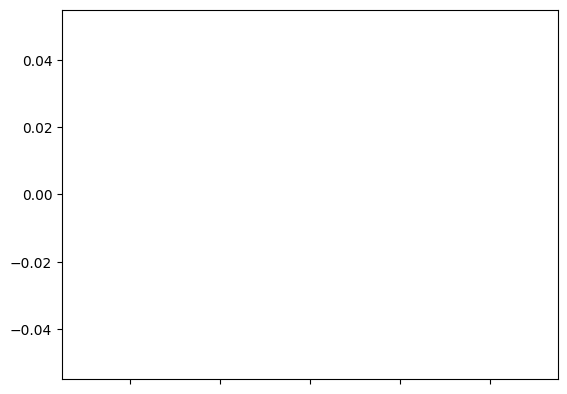

In [ ]:
df[df['Seller_desc'] == 'smita arora']['date'].value_counts().sort_index().plot()